ASSIGNMENT 04:

In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Here  we are importing all the required libraries  for our program.

In [7]:
df=pd.read_excel("C:\\Users\\joshi\\Downloads\\archive (1)\\Traing_Data_analysis.xlsx")
A=df.iloc[:,3]
print(A)
vector_space = A.shape[0]
print(vector_space)
#df['Results'] = np.where(df['grade'] > mean_grade, 1,0)
#print(df.iloc[:,6])

0       1.0
1       1.0
2       1.0
3       1.0
4       0.7
       ... 
1795    1.0
1796    1.0
1797    0.9
1798    1.0
1799    1.0
Name: grade, Length: 1800, dtype: float64
1800


In [4]:
grad=df['grade']
mean0fgrade = df['grade'].mean()
class1_feat_vecs = np.array([])
class2_feat_vecs = np.array([])
 
# Create a new column in df based on the condition
df['results'] = np.where(df['grade'] > mean0fgrade, 1, 0)
 
# Append values to class1_feat_vecs and class2_feat_vecs based on the new column
class1_feat_vecs = np.append(class1_feat_vecs, df[df['results'] == 1]['grade'].values)
class2_feat_vecs = np.append(class2_feat_vecs, df[df['results'] == 0]['grade'].values)
 
centroid1 = class1_feat_vecs.mean(axis=0)
centroid2 = class2_feat_vecs.mean(axis=0)
 
# Calculate the spread (standard deviation) for each class
spread1 = class1_feat_vecs.std(axis=0)
spread2 = class2_feat_vecs.std(axis=0)
 
# Calculate the distance between the centroids of the two classes
interclass_distance = np.linalg.norm(centroid1 - centroid2)
 
print(f"Centroid of Class 1: {centroid1}, Spread: {spread1}")
print(f"Centroid of Class 2: {centroid2}, Spread: {spread2}")
print(f"Interclass Distance: {interclass_distance}")
result = df['results']  
grade=df['grade']

Centroid of Class 1: 0.9767086330935251, Spread: 0.04226877001138608
Centroid of Class 2: 0.600436046511628, Spread: 0.18493347792865555
Interclass Distance: 0.3762725865818971


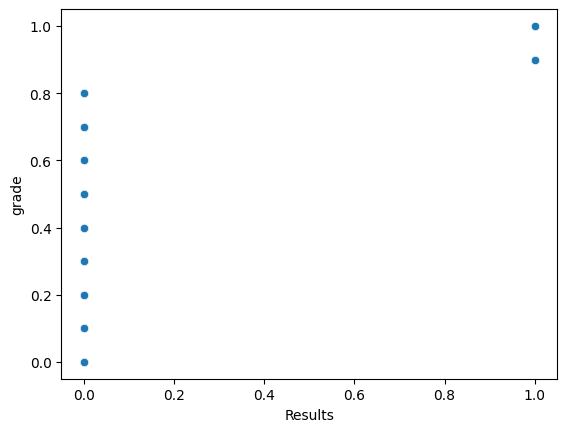

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of 'Chg%' data against the day of the week
sns.scatterplot(x=result, y='grade', data=df)

# Display the plot
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(grade,result,test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=3)
import numpy as np

# Assuming grade is a numpy array
grade_reshaped = grade.to_numpy().reshape(-1, 1)

# Now use grade_reshaped in the fit method
knn.fit(grade_reshaped, result)
# Reshape X_test to a 2D array
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

# Now use X_test_reshaped in the score method
print(knn.score(X_test_reshaped, y_test))
knn.predict(X_test_reshaped)

1.0


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,

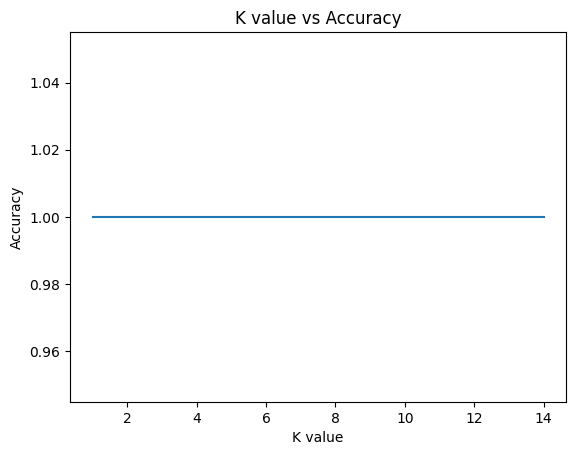

In [6]:
accuracy= []
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(grade_reshaped, result)
    accuracy.append(knn.score(X_test_reshaped, y_test))

plt.plot(range(1,15),accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K value vs Accuracy')
plt.show()